In [2]:
import warnings

warnings.filterwarnings('ignore')



import cv2

import numpy as np

import urllib.request

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.datasets import cifar10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical

from keras.models import Sequential

from keras.layers import Dense, Conv2D, MaxPooling2D

from keras.layers import Dropout, Flatten, BatchNormalization

from keras.regularizers import l2

from keras.optimizers import Adam

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras.models import load_model

from tensorflow.keras import layers

from tensorflow.keras.models import Sequential

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow import keras

import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import classification_report

from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np

import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix

from tensorflow.keras.metrics import categorical_crossentropy

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Resizing, Input

# Import MobileNet explicitly

from tensorflow.keras.applications import MobileNet

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Resizing

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.special import softmax

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import softmax
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle, Circle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation

In [3]:
# Data Preparation and Exploring

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Then, let's split original training data to training and validation sets:

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

Now, we're printing out the dimensions of our training, validation, and test datasets:

In [5]:
print('Train Images Shape:      ', X_train.shape)

print('Train Labels Shape:      ', y_train.shape)



print('\nValidation Images Shape: ', X_valid.shape)

print('Validation Labels Shape: ', y_valid.shape)



print('\nTest Images Shape:       ', X_test.shape)

print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


Afterward, let's take an overview of the CIFAR-10 dataset:

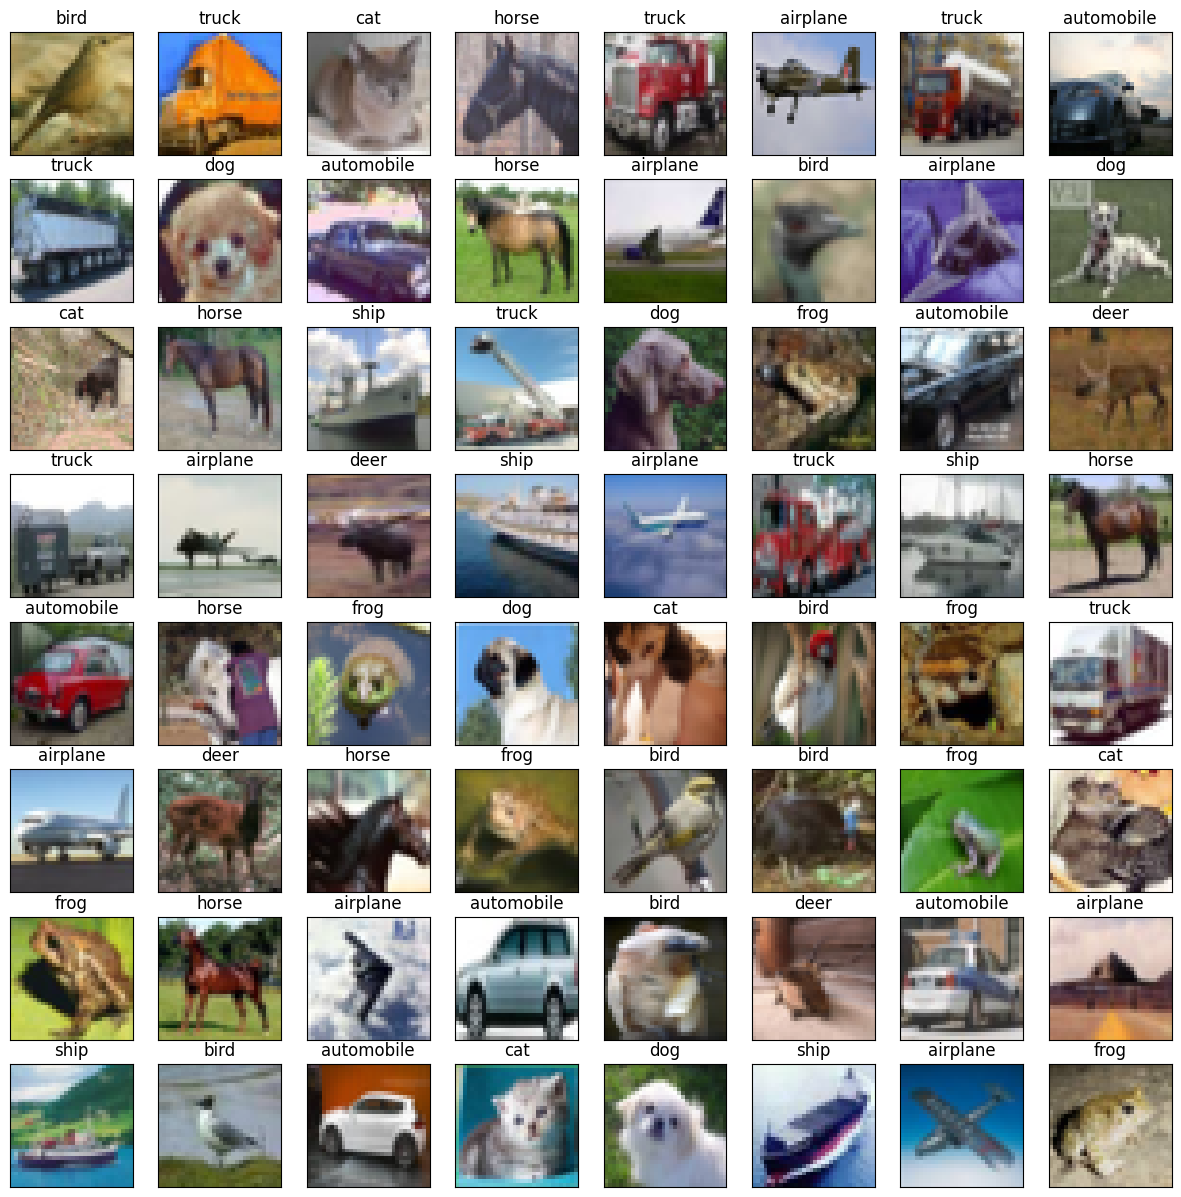

In [6]:
# CIFAR-10 classes

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



# Create a new figure

plt.figure(figsize=(15,15))



# Loop over the first 25 images

for i in range(64):

    # Create a subplot for each image

    plt.subplot(8, 8, i+1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)



    # Display the image

    plt.imshow(X_train[i])



    # Set the label as the title

    plt.title(class_names[y_train[i][0]], fontsize=12)



# Display the figure

plt.show()

Step 3 : Data Preprocessing

To make sure our dataset is appropriately primed for the modeling process, we do the following crucial preliminary steps during the Data Preprocessing phase:

Image Data Normalization

One-Hot Label Encoding

Augmenting Data

In [7]:
# Step 3.1 | Image Data Normalization

# To improve the model's training efficiency and effectiveness, I will first convert the pixel values data type to float32 type and then normalize them by deducting the mean and dividing by the training set's standard deviation:

# Change the data type of the pixel values to float32

X_train = X_train.astype('float32')

X_test  = X_test.astype('float32')

X_valid = X_valid.astype('float32')



# Calculate the mean and standard deviation of the training images

mean = np.mean(X_train)

std  = np.std(X_train)



# Normalize the data

# The tiny value 1e-7 is added to prevent division by zero

X_train = (X_train-mean)/(std+1e-7)

X_test  = (X_test-mean) /(std+1e-7)

X_valid = (X_valid-mean)/(std+1e-7)

One-Hot Encoding of Labels

In order to change the categorical labels into a format that neural networks can use for multi-class classification, I will next convert the class labels to one-hot vectors:

In [8]:
y_train = to_categorical(y_train, 10)

y_valid = to_categorical(y_valid, 10)

y_test  = to_categorical(y_test, 10)


Step : Data Augmentation

Lastly, by producing altered versions of the dataset's photos, I will use data augmentation to fictitiously increase the training set's size. This lessens overfitting by enhancing the model's capacity for generalization. By adding little changes to the preexisting images, data augmentation techniques including rotations, shifts, flips, shearing, and intensity changes expand the collection of training samples available for use in learning.

The particulars of the dataset and the issue at hand frequently influence the choice of data augmentation strategies. Small color photos of objects from ten different classifications make up the CIFAR-10 dataset. Certain enhancement techniques are more appropriate than others given the characteristics of these images:

Rotation: The model can become invariant to the object's orientation with a slight rotation. The image could be randomly rotated between -15 and 15 degrees if the rotation_range=15 value is set. However, because the CIFAR-10 images are rather small, huge rotations could be detrimental because they could cause the item to be outside of the image.

Shift in width and height: Minor adjustments can make the model independent of the object's location inside the picture. Here, width_shift_range=0.12 and height_shift_range=0.12 indicate that the image can be repositioned up to 12% of its width or height, respectively, in a horizontal or vertical direction. Once more, because the images are small, significant shifts could cause the object to be outside of the image.

Horizontal Flip: Since the item of interest in many photos stays the same when flipped horizontally (a flipped car is still a car, for example), a horizontal flip makes sense for this dataset.

Zoom: The model may also perform better when zoomed in by up to 10% (zoom_range=0.1). Excessive zooming, however, could result in a substantial loss of information.

Brightness Range: You can mimic different lighting conditions by adjusting the brightness. The image's brightness is randomly altered to a number between 90% and 110% of its initial brightness when brightness_range=[0.9,1.1].

Shear Intensity: A shear intensity between -10 and +10 degrees is applied when shear_range=10. By slanting the image's shape, this transformation aids the model in identifying objects from various angles.

Channel Shift Intensity: The RGB channels' intensities are randomly moved by up to 10% of their full scale when channel_shift_range=0.1 is set. This can make it easier for the model to adapt to various color and lighting circumstances.

Although certain augmentation methods, such as color jittering and vertical flips, might not be suitable for every class in the CIFAR-10 dataset, the methods used should contribute to the model's increased resilience and capacity for generalization.


In [9]:
# Data augmentation

data_generator = ImageDataGenerator(

    # Randomly rotate pictures by up to 15 degrees.

    rotation_range=15,



   # Rotate pictures horizontally by as much as 12%.

    width_shift_range=0.12,



    # Vertically shift pictures by as much as 12% of their height.

    height_shift_range=0.12,



    # Randomly flip images horizontally

    horizontal_flip=True,



    # Zoom images in by up to 10%

    zoom_range=0.1,



    # Change brightness by up to 10%

    brightness_range=[0.9,1.1],



    # Shear intensity (shear angle in counter-clockwise direction in degrees)

    shear_range=10,



    # Channel shift intensity

    channel_shift_range=0.1,

)

When running the above code, we are setting up a pipeline for preprocessing the images during model training. The generator applies a series of random transformations (specified by the parameters) to the images each time they are loaded into the model for training. Each time an epoch is run during model training, these random transformations will create different variations of the original images. These changes are made on-the-fly and don't modify our original dataset.

Building the CNN Base Model using Keras

In [10]:
num_classes = 10



model = Sequential()



model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))

model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.3))



model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))

model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.5))



model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))

model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.5))



model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.5)) ## This helps to reduce overfitting

model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10



# Checking the model summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [11]:
# Compiling the Model

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,  metrics=['accuracy'])

In [12]:
# Fitting the Model

# Create TensorFlow Datasets

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')


# Include ModelCheckpoint to help you save weight when you train.

checkpoint = ModelCheckpoint('./.model_cifar10.keras',  # Filepath to save the weights

                             monitor='val_loss',  # Metric to monitor for saving (e.g., validation loss)

                             save_best_only=True,  # Save only the best model (based on the monitored metric)

                             mode='min')  # 'min' for minimizing the monitored metric (like loss)





history = model.fit(train_dataset.batch(batch_size=64), epochs=10,

                    validation_data=valid_dataset.batch(batch_size=64),

                    callbacks=[EarlyStopping(patience=3, monitor='val_loss'), reduce_lr_loss, checkpoint]) # Added checkpoint

Epoch 1/10


I0000 00:00:1731235820.575552      81 service.cc:145] XLA service 0x7914e40084c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731235820.575607      81 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731235820.575612      81 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 16/704 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.1259 - loss: 3.3668  

I0000 00:00:1731235832.102338      81 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.3152 - loss: 2.1320 - val_accuracy: 0.5124 - val_loss: 1.3491 - learning_rate: 0.0010
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5209 - loss: 1.3252 - val_accuracy: 0.6388 - val_loss: 1.0075 - learning_rate: 0.0010
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6267 - loss: 1.0574 - val_accuracy: 0.7026 - val_loss: 0.8224 - learning_rate: 0.0010
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6705 - loss: 0.9324 - val_accuracy: 0.7236 - val_loss: 0.7725 - learning_rate: 0.0010
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7018 - loss: 0.8495 - val_accuracy: 0.7548 - val_loss: 0.7024 - learning_rate: 0.0010
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7296 - loss: 0.7857 - val_accuracy: 0.7740 - val_loss: 0.6511 - learning_rate: 0.0010
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7493 - loss: 0.7271 - val_accur

Visualizing the Evaluation

Text(0.5, 1.0, 'Loss Curves')

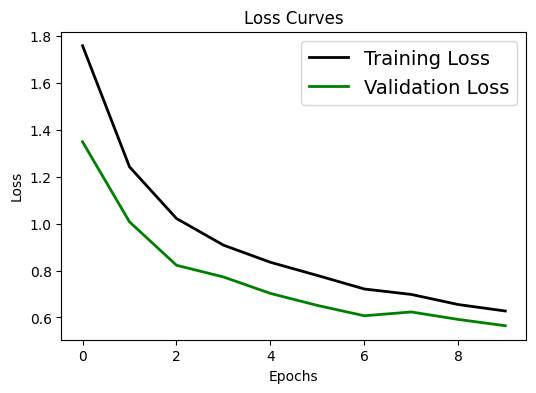

In [13]:
# Loss curve

plt.figure(figsize=[6,4])

plt.plot(history.history['loss'], 'black', linewidth=2.0)

plt.plot(history.history['val_loss'], 'green', linewidth=2.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)

plt.xlabel('Epochs', fontsize=10)

plt.ylabel('Loss', fontsize=10)

plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

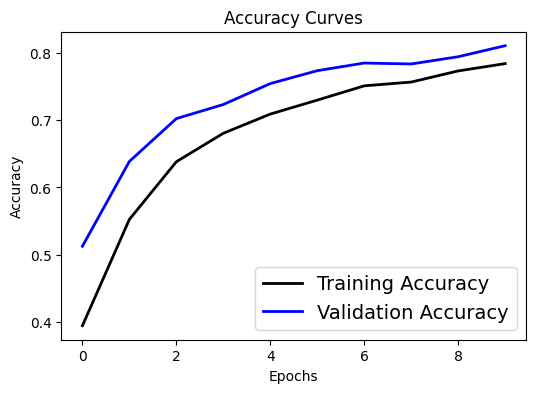

In [14]:
# Accuracy curve

plt.figure(figsize=[6,4])

plt.plot(history.history['accuracy'], 'black', linewidth=2.0)

plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)

plt.xlabel('Epochs', fontsize=10)

plt.ylabel('Accuracy', fontsize=10)

plt.title('Accuracy Curves', fontsize=12)

In [15]:
# Predictions on Test Data

model.load_weights('./.model_cifar10.keras')



   # Making the Predictions

pred = model.predict(X_test)



   # Creating a label index from the predictions

pred_classes = np.argmax(pred, axis=1)



   # Assuming 'test_labels' are already in one-hot encoded format

true_classes = np.argmax(y_test, axis=1)

accuracy = (pred_classes == true_classes).sum() * 1.0 / y_test.shape[0]

print('test_accuracy = {}'.format(accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
test_accuracy = 0.807


In [16]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.92      0.90      0.91      1000
           2       0.75      0.68      0.72      1000
           3       0.72      0.58      0.64      1000
           4       0.81      0.77      0.79      1000
           5       0.67      0.79      0.72      1000
           6       0.79      0.89      0.84      1000
           7       0.84      0.85      0.85      1000
           8       0.91      0.86      0.89      1000
           9       0.85      0.91      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



Model : lightweight VGG-style

The VGG16 network served as the model architecture's inspiration. It has several convolutional layers, max-pooling and dropout layers, and a fully connected classification layer at the end. This design is simpler, guarantees fewer parameters, and has a more straightforward architecture, making it more computationally efficient even though it does not use sophisticated modules like residuals or inceptions.

This is a synopsis of the architecture:



The network starts with two Conv2D layers, each of which has 32 3x3 filters. A Batch Normalization layer comes next, which speeds up training and adds a degree of regularization to assist avoid overfitting.

A MaxPooling2D layer, which decreases the spatial dimensions (height and breadth) after the pairings of Conv2D layers, essentially offers a type of translation invariance and lowers computing cost. A Dropout layer comes next, which helps avoid overfitting by randomly setting a fraction (0.2 for the first dropout layer) of the input units to 0 at each training update.


Three more times, this pattern of two Conv2D layers is repeated, followed by a Batch Normalization layer, a MaxPooling2D layer, and a Dropout layer. With every iteration, the Conv2D layers' filter count doubles, rising from 32 to 64, 128 and finally 256. At every level, the network learns increasingly complicated information thanks to this expanding pattern. At every stage, the dropout rate rises from 0.2 to 0.5.

A Flatten layer is used to transform the 2D outputs of the previous layer into a 1D vector after the convolutional and pooling layers.

Last but not least, classification is done using a Dense (or completely linked) layer. Each of its ten units corresponds to one of the CIFAR-10 dataset's ten classes, and the outputs are converted to probability scores for each class using a softmax activation function.

In order to learn hierarchical features from the CIFAR-10 images, this architecture makes use of deep CNNs' advantages. To counteract overfitting, regularization strategies including Batch Normalization, Dropout, and L2 regularization are also employed. Despite being influenced by VGG16, the model is still more straightforward and does not include the more sophisticated elements of more recent architectures, instead emphasizing simplicity and efficiency.

In [17]:
# Initialize a sequential model

model = Sequential()



# Set the weight decay value for L2 regularization

weight_decay = 0.0001



# Add the first convolutional layer with 32 filters of size 3x3

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),

                 input_shape=X_train.shape[1:]))

# Add batch normalization layer

model.add(BatchNormalization())



# Add the second convolutional layer similar to the first

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

model.add(BatchNormalization())



# Add the first max pooling layer with pool size of 2x2

model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with 0.2 dropout rate

model.add(Dropout(rate=0.2))



# Add the third and fourth convolutional layers with 64 filters

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

model.add(BatchNormalization())



# Add the second max pooling layer and increase dropout rate to 0.3

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.3))



# Add the fifth and sixth convolutional layers with 128 filters

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

model.add(BatchNormalization())



# Add the third max pooling layer and increase dropout rate to 0.4

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.4))



# Add the seventh and eighth convolutional layers with 256 filters

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

model.add(BatchNormalization())



# Add the fourth max pooling layer and increase dropout rate to 0.5

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.5))



# Flatten the tensor output from the previous layer

model.add(Flatten())



# Add a fully connected layer with softmax activation function for outputting class probabilities

model.add(Dense(10, activation='softmax'))

Let's display the detailed architecture of the model:

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,186,346 (4.53 MB)

 Trainable params: 1,184,426 (4.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

Our model consists of 1,186,346 parameters, of which 1,184,426 are trainable. This is a relatively compact model, especially when compared to advanced architectures which often have tens or even hundreds of millions of parameters.

Step : Training the CNN

Now, I am going to train my neural network model. The training uses a batch size of 64 and will run for a maximum of 250 epochs or until the early stopping condition is met. During the training, the model's performance is evaluated on the validation data after each epoch. I've added a couple of callback functions to enhance the training process:



The ReduceLROnPlateau callback is used to reduce the learning rate by half (factor=0.5) whenever the validation loss does not improve for 10 consecutive epochs. This helps to adjust the learning rate dynamically, allowing the model to get closer to the global minimum of the loss function when progress has plateaued. This strategy can improve the convergence of the training process.

The EarlyStopping callback is employed to monitor the validation loss and halt the training process when there hasn't been any improvement for a certain number of epochs, ensuring that the model doesn't waste computational resources and time. Furthermore, this callback restores the best weights from the training process, ensuring we conclude with the optimal model configuration from the epochs.

In [19]:
# Set the batch size for the training

batch_size = 64



# Set the maximum number of epochs for the training

epochs = 50



# Define the optimizer (Adam)

optimizer = Adam(learning_rate=0.0005)



# Compile the model with the defined optimizer, loss function, and metrics

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



# Add ReduceLROnPlateau callback

# Here, the learning rate will be reduced by half (factor=0.5) if no improvement in validation loss is observed for 10 epochs

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)



# Include a callback for EarlyStopping

# In this case, training will end after 40 epochs if there is no discernible improvement in validation loss.

# The model weights are reset to the values from the epoch thanks to the `restore_best_weights` argument.

# using the monitored quantity's best value ('val_loss' in this instance).

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

# Use the specified batch size and number of epochs to fit the model to the training data.

# During training, the model's performance is assessed using the validation data.

# The callbacks that have been put in place include learning rate reduction when validation loss reaches a plateau and

# terminating training early if no progress is seen

model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),

          epochs=epochs,

          validation_data=(X_valid, y_valid),

          callbacks=[reduce_lr, early_stopping],

          verbose=2)

Epoch 1/50
704/704 - 74s - 105ms/step - accuracy: 0.3323 - loss: 2.3592 - val_accuracy: 0.4774 - val_loss: 1.5737 - learning_rate: 5.0000e-04
Epoch 2/50
704/704 - 50s - 71ms/step - accuracy: 0.4604 - loss: 1.7601 - val_accuracy: 0.5202 - val_loss: 1.5980 - learning_rate: 5.0000e-04
Epoch 3/50
704/704 - 50s - 71ms/step - accuracy: 0.5298 - loss: 1.5347 - val_accuracy: 0.5710 - val_loss: 1.7371 - learning_rate: 5.0000e-04
Epoch 4/50
704/704 - 50s - 72ms/step - accuracy: 0.5759 - loss: 1.3785 - val_accuracy: 0.6272 - val_loss: 1.1895 - learning_rate: 5.0000e-04
Epoch 5/50
704/704 - 50s - 71ms/step - accuracy: 0.6111 - loss: 1.2503 - val_accuracy: 0.6746 - val_loss: 1.0411 - learning_rate: 5.0000e-04
Epoch 6/50
704/704 - 50s - 72ms/step - accuracy: 0.6424 - loss: 1.1414 - val_accuracy: 0.6512 - val_loss: 1.1819 - learning_rate: 5.0000e-04
Epoch 7/50
704/704 - 50s - 71ms/step - accuracy: 0.6682 - loss: 1.0700 - val_accuracy: 0.7122 - val_loss: 1.0030 - learning_rate: 5.0000e-04
Epoch 8/50
7

Visualising the Learning Curves

Now I am going to generate plots for visualizing the training and validation loss, and accuracy evolution over epochs using model history:

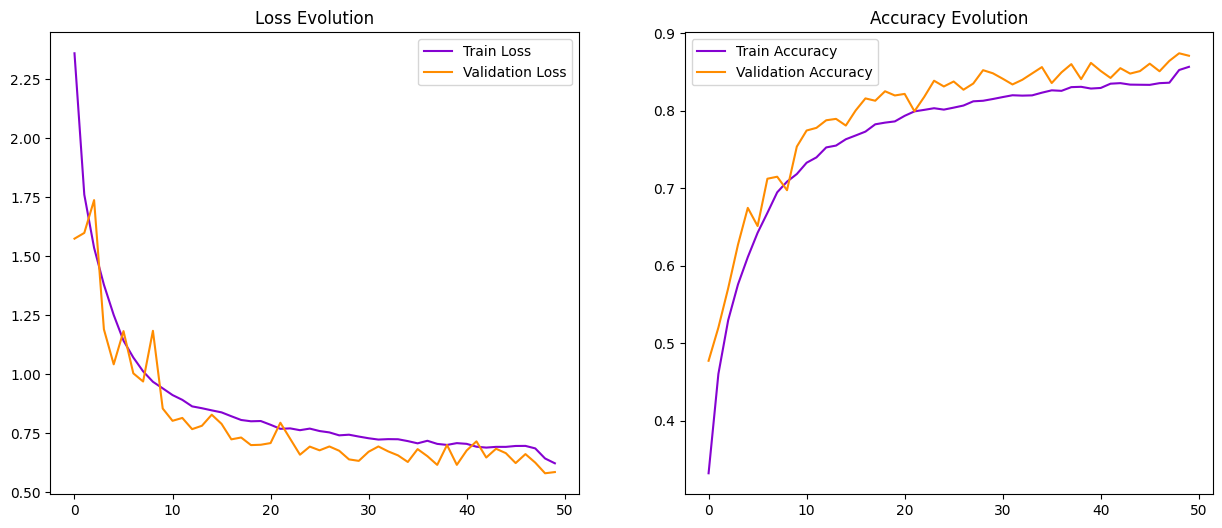

In [20]:
plt.figure(figsize=(15,6))



# Plotting the training and validation loss

plt.subplot(1, 2, 1)

plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')

plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')

plt.legend()

plt.title('Loss Evolution')



# Plotting the training and validation accuracy

plt.subplot(1, 2, 2)

plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')

plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')

plt.legend()

plt.title('Accuracy Evolution')



plt.show()

It is clear from the aforementioned visualizations that the model is operating effectively and showing no symptoms of overfitting. The tight alignment of training and validation accuracy and loss figures over the course of training lends credence to this hypothesis. The model's good generalization to unknown data is demonstrated by the little accuracy difference between training and validation. The claim of good generalization is further supported by the fact that the model's loss on validation data roughly resembles the training loss. As a result, it seems that the model is properly regularized and does not overfit to the training set.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8707 - loss: 0.6021
Test Accuracy : 86.94%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


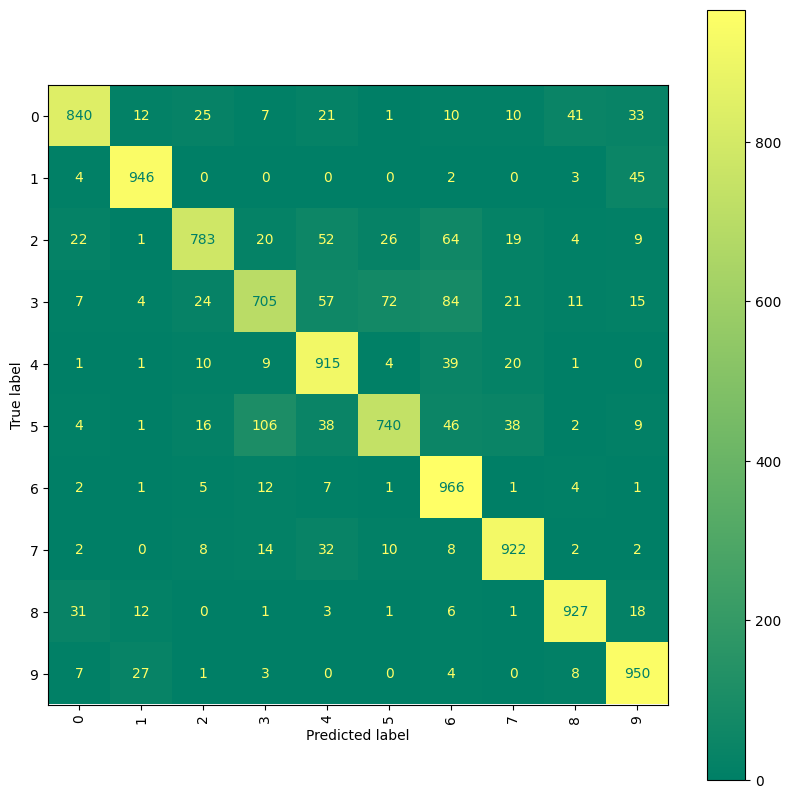

In [21]:
# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)

# Convert both predictions and true labels to class indices
y_pred = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Get number of classes
n_classes = y_test.shape[1]

# Create labels list (0 to n_classes-1)
labels = [str(i) for i in range(n_classes)]

cm = confusion_matrix(y_test_classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()

In [22]:
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred, target_names=labels))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1000
           1       0.94      0.95      0.94      1000
           2       0.90      0.78      0.84      1000
           3       0.80      0.70      0.75      1000
           4       0.81      0.92      0.86      1000
           5       0.87      0.74      0.80      1000
           6       0.79      0.97      0.87      1000
           7       0.89      0.92      0.91      1000
           8       0.92      0.93      0.93      1000
           9       0.88      0.95      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Evaluating Optimal Model on Test Data

In [23]:
# Use the model to make predictions, evaluate on test data

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)



print('\nTest Accuracy:', test_acc)

print('Test Loss:    ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8707 - loss: 0.6021

Test Accuracy: 0.8694000244140625
Test Loss:     0.6043359041213989


Test on One Image :

 Image 100 is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
The model predict that image 100 is 4


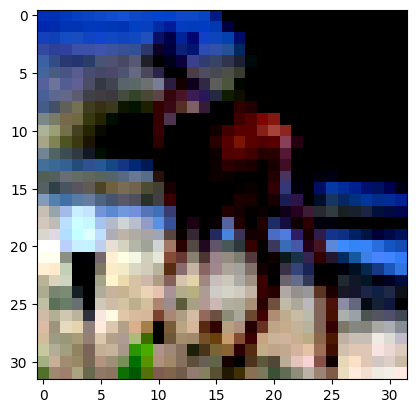

In [24]:
my_image = X_test[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_labels, images):
    true_label = np.argmax(true_labels[i])  # Convert one-hot to index
    img = images[i]  # Get specific image
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)  
    
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel(f"{labels[predicted_label]} {100*np.max(predictions_array):2.0f}% \n(True: {labels[true_label]})", 
               color=color)

def plot_value_array(i, predictions_array, true_labels):
    true_label = np.argmax(true_labels[i])
    plt.grid(False)
    plt.xticks(range(10), labels, rotation=45, fontsize=8)
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('yellow')
    thisplot[true_label].set_color('green')


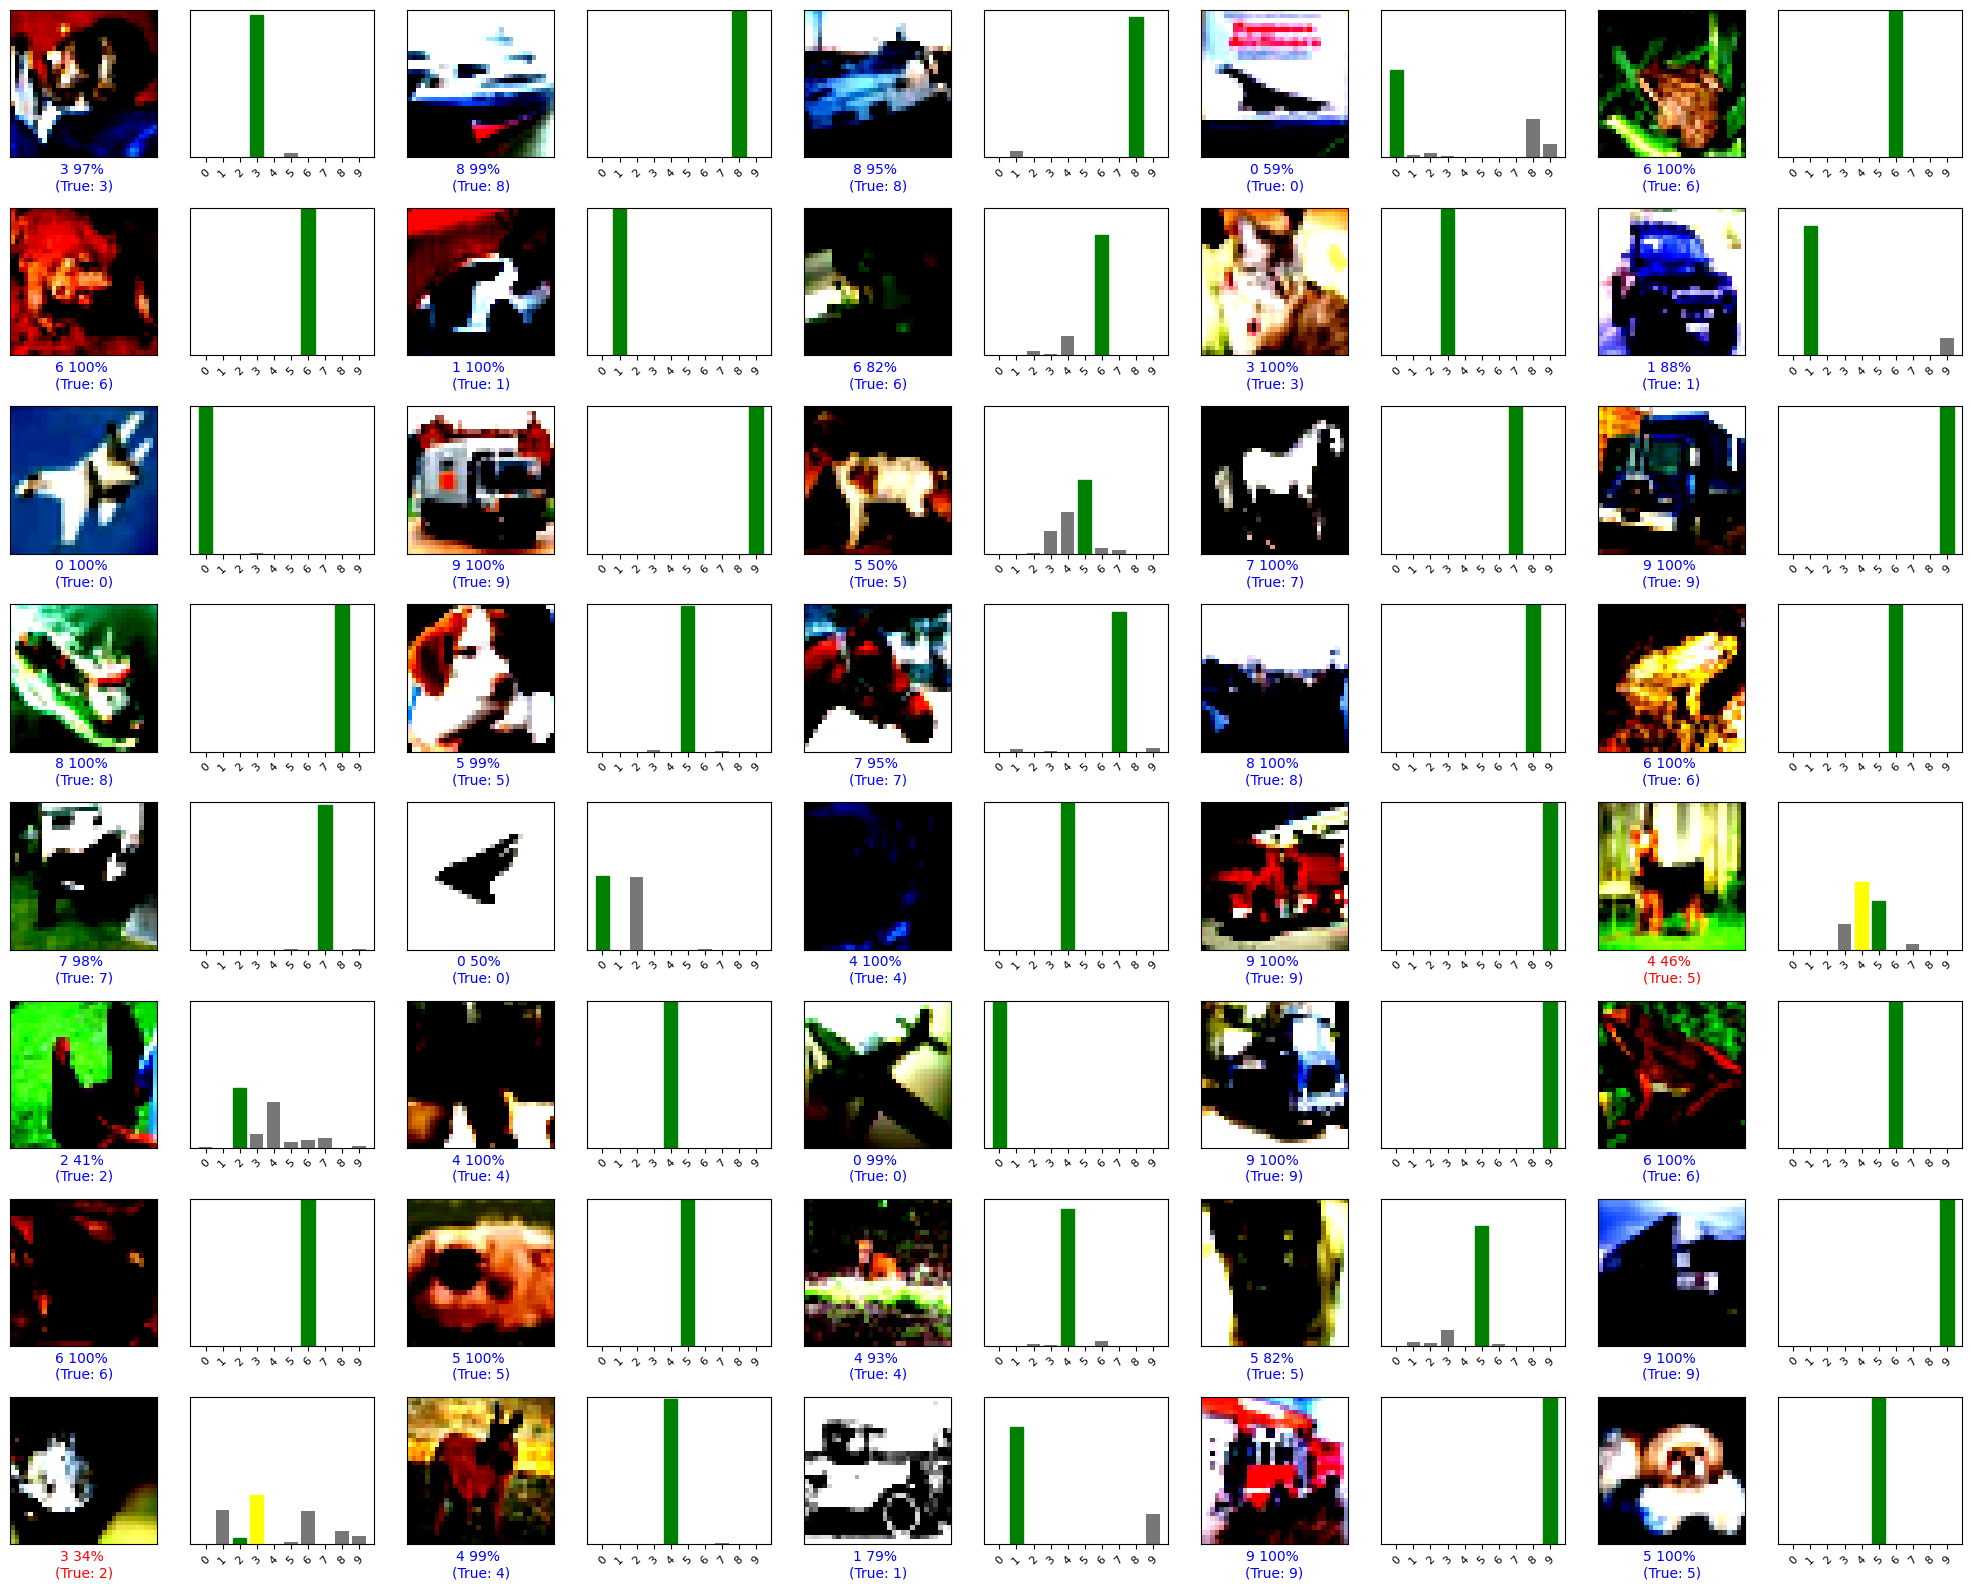

In [26]:
predictions = model.predict(X_test, verbose=0)

# Plot images and their predictions
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], y_test)

plt.tight_layout()
plt.show()

MobileNet

In [27]:
# Base model for the mobilenet model

mobnet_model=MobileNet(weights='imagenet',include_top=False)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
# Let's first verify MobileNet initialization

base_model = MobileNet(

    input_shape=(32, 32, 3),

    include_top=False,

    weights=None

)



# Print base model summary to verify it's created correctly

print("Base MobileNet Summary:")

base_model.summary()

Base MobileNet Summary:


Model: "mobilenet_1.00_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 16, 16, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 8, 8, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 8, 8, 128)      │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [29]:
# Create the complete model with an Input layer

model1 = Sequential([

    Input(shape=(32, 32, 3)),  

    base_model,

    GlobalAveragePooling2D(),

    Dense(1024, activation='relu'),

    Dense(512, activation='relu'),

    Dense(256, activation='relu'),

    Dropout(0.5),

    Dense(128, activation='relu'),

    Dropout(0.5),

    Dense(10, activation='softmax')

])


In [30]:
model1.compile(

    optimizer='adam',

    loss='categorical_crossentropy',

    metrics=['accuracy']

)

In [31]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_32 (Functional)  │ (None, 1, 1, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,968,778 (18.95 MB)

 Trainable params: 4,946,890 (18.87 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


# Create data generator for augmentation

def create_data_generator():
    """Create and return data generator with augmentation"""
    return ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False
    )

# Training setup with callbacks
def train_model(model, X_train, y_train, X_valid, y_valid, batch_size=64, epochs=15):
    # Callbacks
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
    
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
    
    checkpoint = ModelCheckpoint(
        'best_model.keras',  # Changed from .h5 to .keras
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    )
    
    # Create data generator
    data_generator = create_data_generator()
    
    # Train model
    history = model.fit(
        data_generator.flow(X_train, y_train, batch_size=batch_size),
        epochs=epochs,
        validation_data=(X_valid, y_valid),
        callbacks=[reduce_lr, early_stopping, checkpoint],
        verbose=1
    )
    
    return history


In [33]:
# Train the model
history = train_model(model1, X_train, y_train, X_valid, y_valid)

Epoch 1/15
702/704 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1667 - loss: 2.1738
Epoch 1: val_accuracy improved from -inf to 0.27400, saving model to best_model.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 72s 66ms/step - accuracy: 0.1669 - loss: 2.1732 - val_accuracy: 0.2740 - val_loss: 1.8977 - learning_rate: 0.0010
Epoch 2/15
701/704 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2999 - loss: 1.8170
Epoch 2: val_accuracy improved from 0.27400 to 0.36840, saving model to best_model.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.2999 - loss: 1.8168 - val_accuracy: 0.3684 - val_loss: 1.6504 - learning_rate: 0.0010
Epoch 3/15
702/704 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3530 - loss: 1.7100
Epoch 3: val_accuracy improved from 0.36840 to 0.43860, saving model to best_model.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.3531 - loss: 1.7099 - val_accuracy: 0.4386 - val_loss: 1.5482 - learning_rate: 0.0010
Epoch 4/15
701/704 ━━━━━━━━━━━━━━━━━━━━ 0s 44m

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


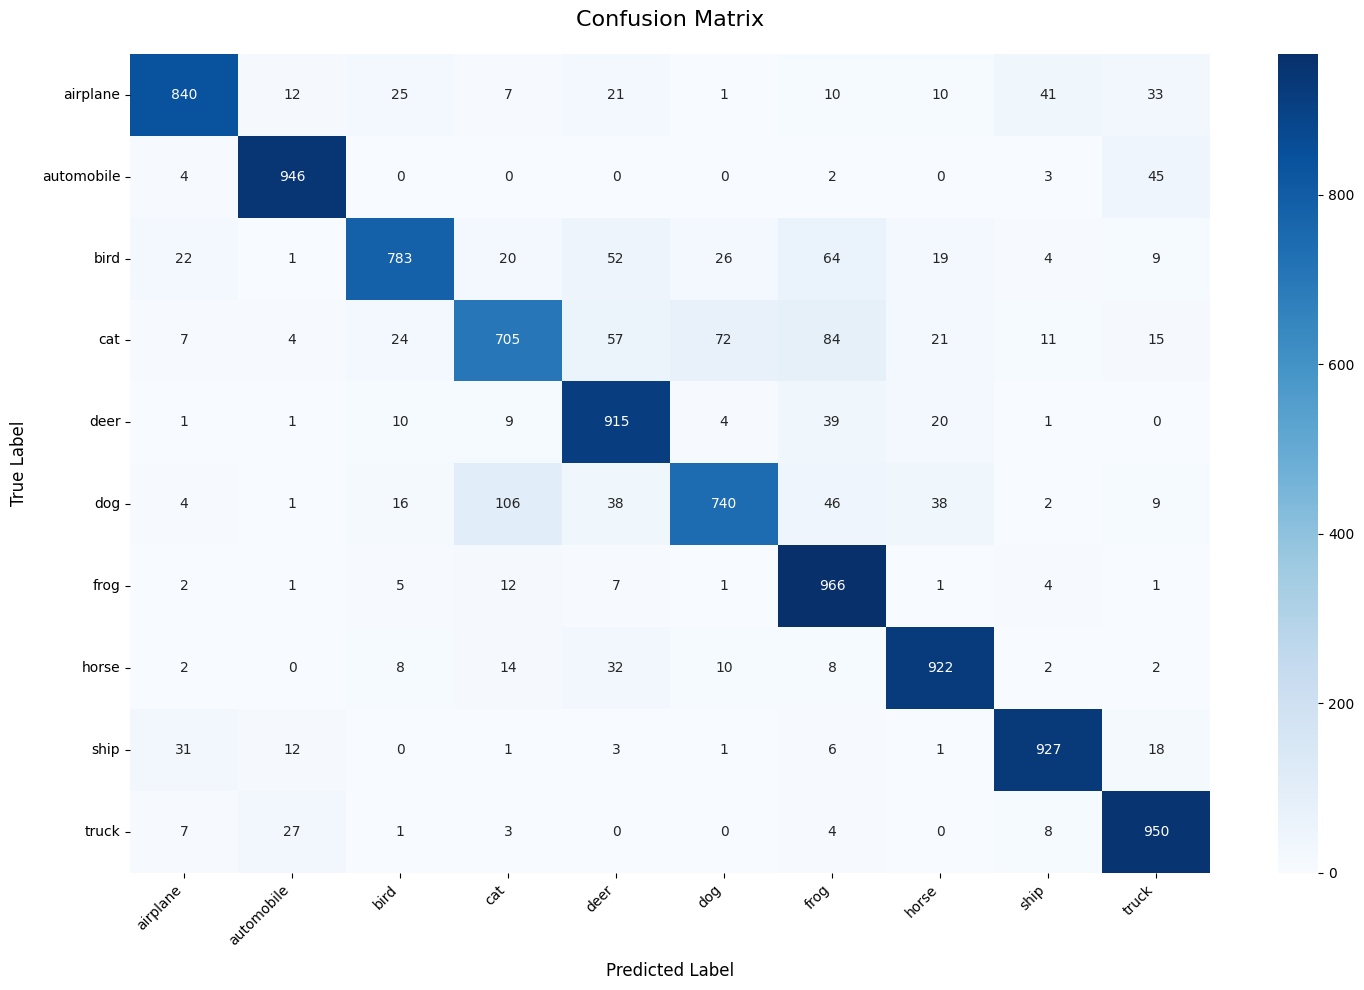


Classification Report:
              precision    recall  f1-score   support

    airplane      0.913     0.840     0.875      1000
  automobile      0.941     0.946     0.944      1000
        bird      0.898     0.783     0.837      1000
         cat      0.804     0.705     0.751      1000
        deer      0.813     0.915     0.861      1000
         dog      0.865     0.740     0.798      1000
        frog      0.786     0.966     0.867      1000
       horse      0.893     0.922     0.907      1000
        ship      0.924     0.927     0.926      1000
       truck      0.878     0.950     0.913      1000

    accuracy                          0.869     10000
   macro avg      0.872     0.869     0.868     10000
weighted avg      0.872     0.869     0.868     10000


Per-class Accuracy:
airplane  : 84.00%
automobile: 94.60%
bird      : 78.30%
cat       : 70.50%
deer      : 91.50%
dog       : 74.00%
frog      : 96.60%
horse     : 92.20%
ship      : 92.70%
truck     : 95.00%

Most 

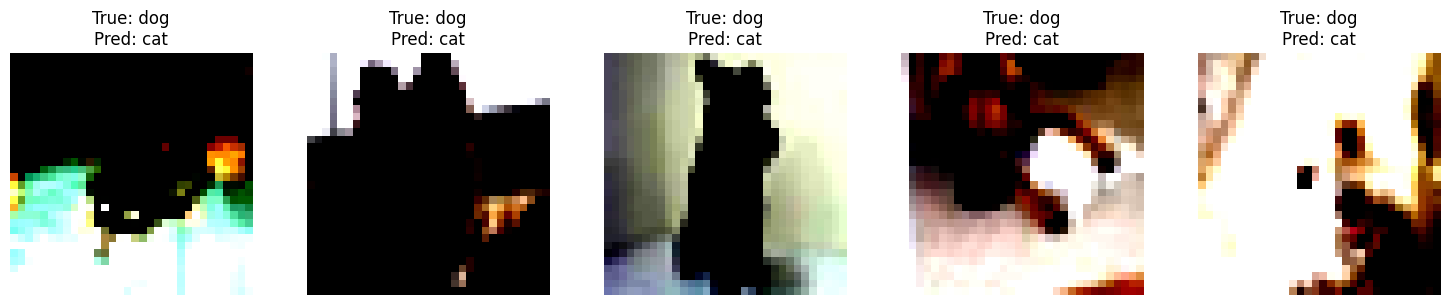

In [34]:
y_pred = model.predict(X_test, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(15, 10))

sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

# Improve the visualization
plt.title('Confusion Matrix', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=12, labelpad=10)
plt.ylabel('True Label', fontsize=12, labelpad=10)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, 
                          target_names=class_names,
                          digits=3))

# Print per-class accuracy
print("\nPer-class Accuracy:")
for i in range(len(class_names)):
    class_mask = y_test_classes == i
    class_acc = np.mean(y_pred_classes[class_mask] == i) * 100
    print(f"{class_names[i]:<10}: {class_acc:.2f}%")

# Visualize most confused pairs
def plot_most_confused_pairs(cm, class_names, top_k=5):
    confusion_pairs = []
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j:
                confusion_pairs.append((i, j, cm[i, j]))
    
    # Sort by number of confusions
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    
    print("\nMost Confused Class Pairs:")
    for true_idx, pred_idx, count in confusion_pairs[:top_k]:
        print(f"True: {class_names[true_idx]:<10} Predicted: {class_names[pred_idx]:<10} Count: {count}")

plot_most_confused_pairs(cm, class_names)

def plot_confused_examples(X_test, y_test_classes, y_pred_classes, class_names, 
                         true_class, pred_class, num_examples=5):
    mask = (y_test_classes == true_class) & (y_pred_classes == pred_class)
    confused_indices = np.where(mask)[0]
    
    if len(confused_indices) == 0:
        return
    
    n = min(num_examples, len(confused_indices))
    plt.figure(figsize=(15, 3))
    
    for i in range(n):
        plt.subplot(1, n, i + 1)
        idx = confused_indices[i]
        plt.imshow(X_test[idx])
        plt.title(f'True: {class_names[true_class]}\nPred: {class_names[pred_class]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get the most confused pair
confused_pairs = [(i, j) for i in range(len(class_names)) 
                 for j in range(len(class_names)) if i != j]
most_confused = max(confused_pairs, key=lambda x: cm[x[0], x[1]])

print(f"\nShowing examples of {class_names[most_confused[0]]} classified as {class_names[most_confused[1]]}:")
plot_confused_examples(X_test, y_test_classes, y_pred_classes, class_names, 
                      most_confused[0], most_confused[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8707 - loss: 0.6021

Test Set Performance:
Test Loss: 0.6043
Test Accuracy: 86.94%


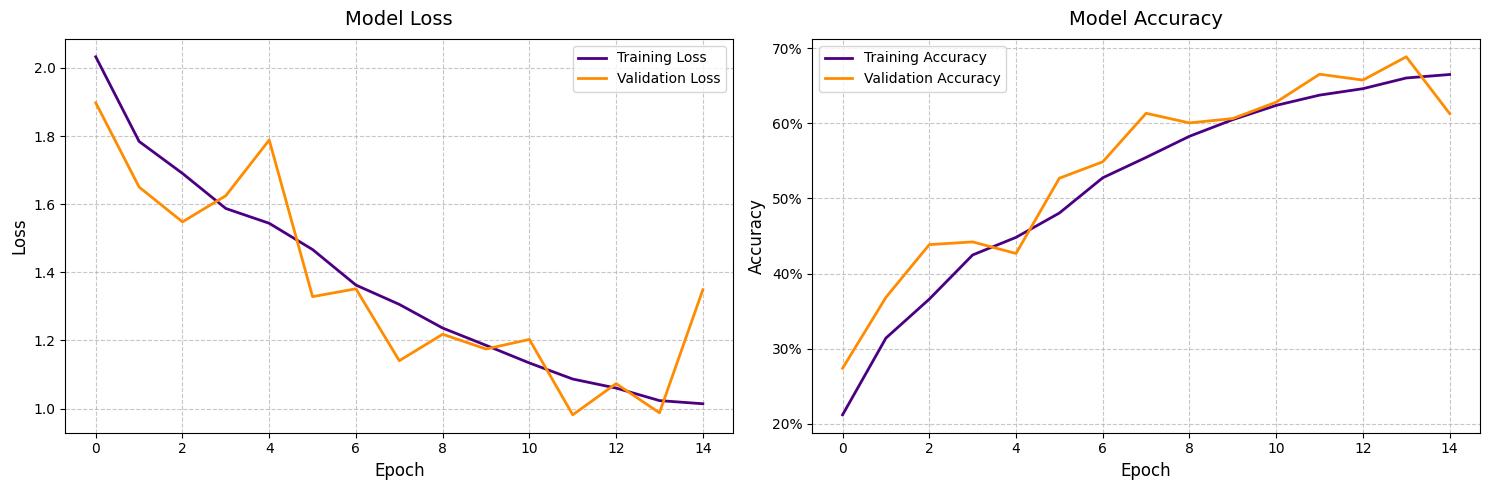


Training Summary:
Best Training Loss: 1.0142
Best Validation Loss: 0.9817
Best Training Accuracy: 66.50%
Best Validation Accuracy: 68.86%

Best Model at Epoch: 12


In [35]:
# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot loss
    ax1.plot(history.history['loss'], color='#4B0082', linewidth=2, label='Training Loss')
    ax1.plot(history.history['val_loss'], color='#FF8C00', linewidth=2, label='Validation Loss')
    ax1.set_title('Model Loss', fontsize=14, pad=10)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(fontsize=10)
    
    # Plot accuracy
    ax2.plot(history.history['accuracy'], color='#4B0082', linewidth=2, label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], color='#FF8C00', linewidth=2, label='Validation Accuracy')
    ax2.set_title('Model Accuracy', fontsize=14, pad=10)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(fontsize=10)
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    plt.tight_layout()
    plt.show()
    
    # Print training summary
    print("\nTraining Summary:")
    print(f"Best Training Loss: {min(history.history['loss']):.4f}")
    print(f"Best Validation Loss: {min(history.history['val_loss']):.4f}")
    print(f"Best Training Accuracy: {max(history.history['accuracy']):.2%}")
    print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.2%}")
    
    # Analyze convergence
    best_epoch = np.argmin(history.history['val_loss']) + 1
    print(f"\nBest Model at Epoch: {best_epoch}")

# 4. Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Set Performance:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

# 5. Plot training history
plot_training_history(history)

Analyzing single image:


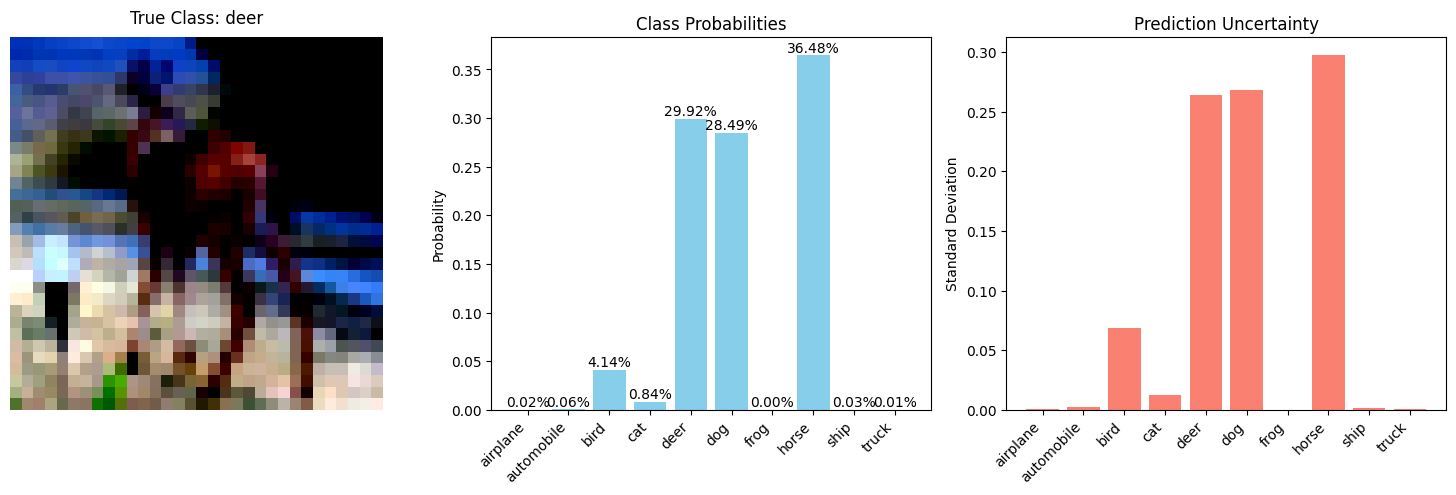


Prediction Analysis:
--------------------------------------------------
Class            Probability  Uncertainty
--------------------------------------------------
airplane              0.02%        0.001
automobile            0.06%        0.002
bird                  4.14%        0.068
cat                   0.84%        0.012
deer                 29.92%        0.264
dog                  28.49%        0.268
frog                  0.00%        0.000
horse                36.48%        0.297
ship                  0.03%        0.001
truck                 0.01%        0.000

Summary:
True Class: deer
Predicted Class: horse
Confidence: 36.48%
Uncertainty: 0.297
✗ Incorrect Prediction

Analyzing multiple images:

Analyzing Image 1/3


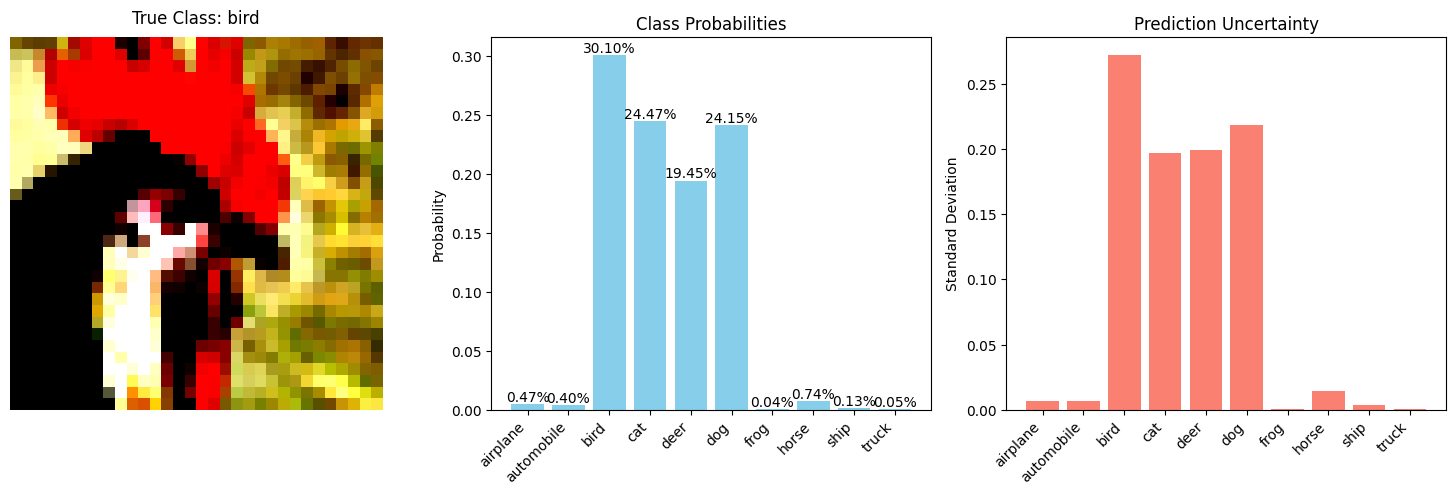


Prediction Analysis:
--------------------------------------------------
Class            Probability  Uncertainty
--------------------------------------------------
airplane              0.47%        0.007
automobile            0.40%        0.007
bird                 30.10%        0.272
cat                  24.47%        0.197
deer                 19.45%        0.199
dog                  24.15%        0.218
frog                  0.04%        0.000
horse                 0.74%        0.014
ship                  0.13%        0.004
truck                 0.05%        0.001

Summary:
True Class: bird
Predicted Class: bird
Confidence: 30.10%
Uncertainty: 0.272
✓ Correct Prediction



Analyzing Image 2/3


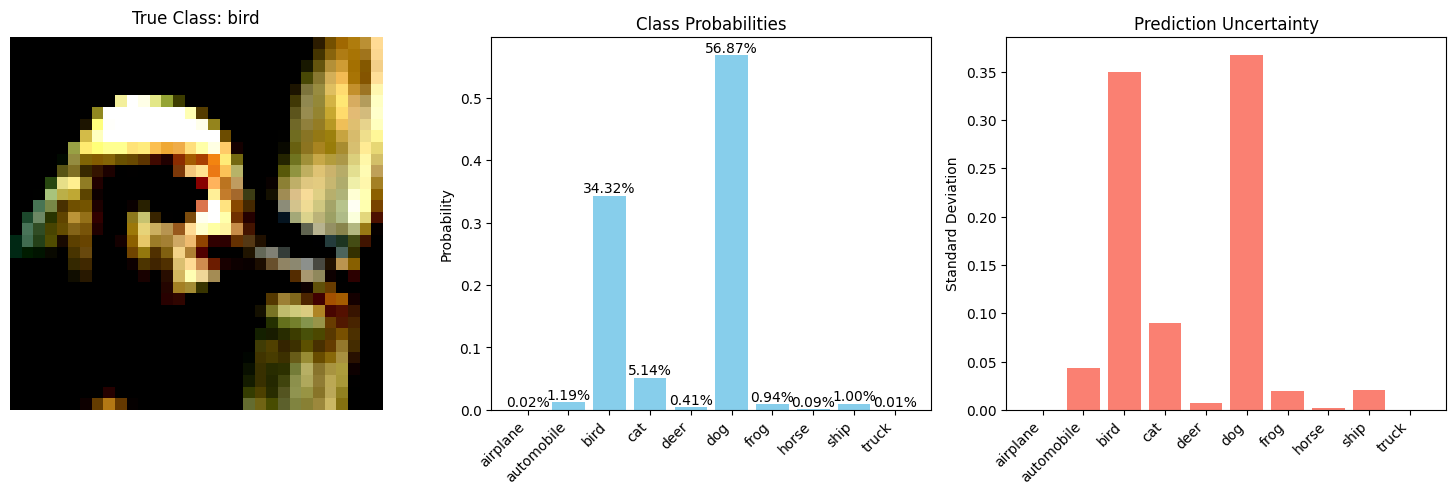


Prediction Analysis:
--------------------------------------------------
Class            Probability  Uncertainty
--------------------------------------------------
airplane              0.02%        0.000
automobile            1.19%        0.043
bird                 34.32%        0.350
cat                   5.14%        0.090
deer                  0.41%        0.007
dog                  56.87%        0.367
frog                  0.94%        0.019
horse                 0.09%        0.002
ship                  1.00%        0.021
truck                 0.01%        0.000

Summary:
True Class: bird
Predicted Class: dog
Confidence: 56.87%
Uncertainty: 0.367
✗ Incorrect Prediction



Analyzing Image 3/3


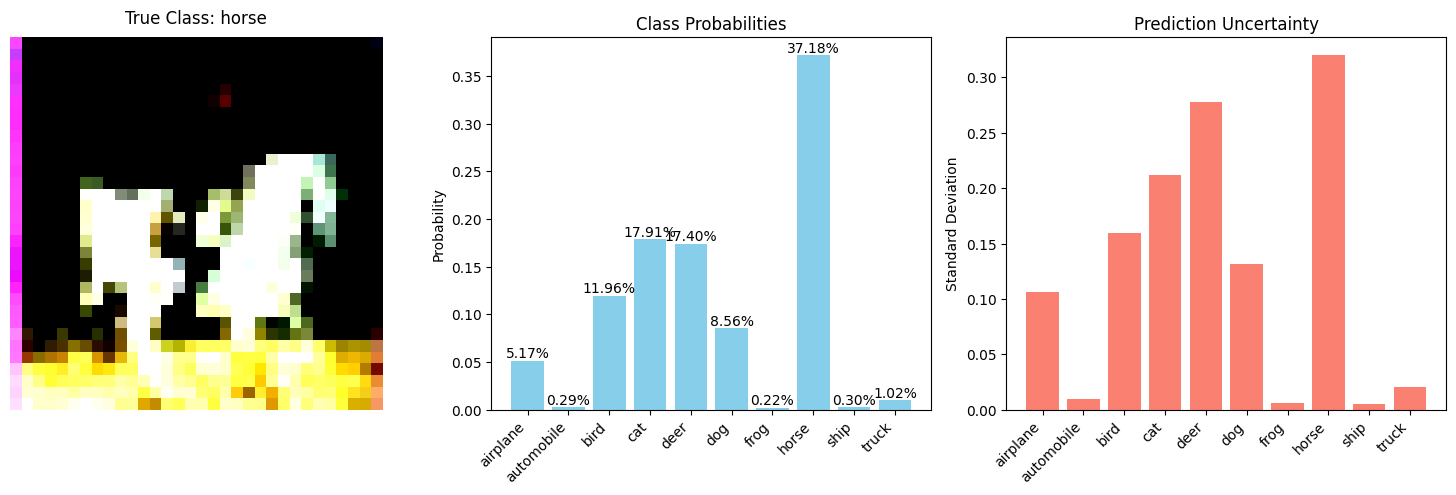


Prediction Analysis:
--------------------------------------------------
Class            Probability  Uncertainty
--------------------------------------------------
airplane              5.17%        0.107
automobile            0.29%        0.010
bird                 11.96%        0.160
cat                  17.91%        0.212
deer                 17.40%        0.278
dog                   8.56%        0.132
frog                  0.22%        0.006
horse                37.18%        0.320
ship                  0.30%        0.006
truck                 1.02%        0.020

Summary:
True Class: horse
Predicted Class: horse
Confidence: 37.18%
Uncertainty: 0.320
✓ Correct Prediction




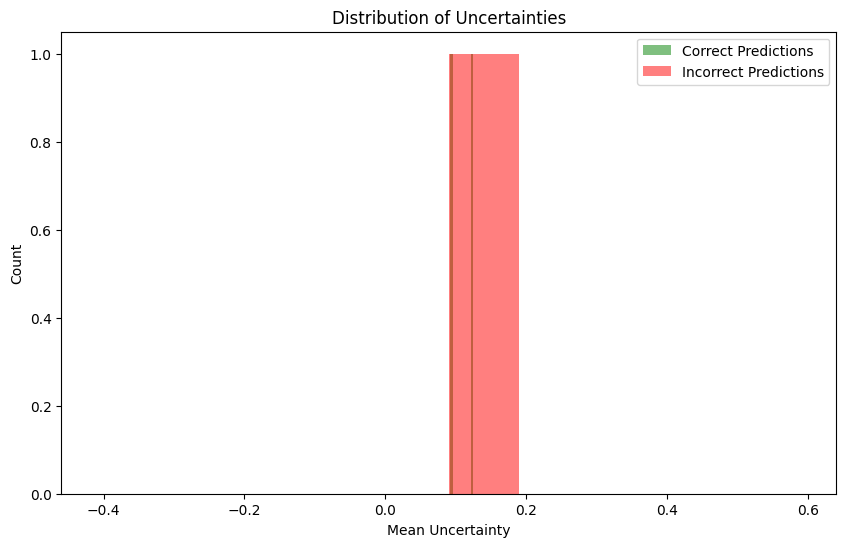


Uncertainty Statistics:
Mean uncertainty for correct predictions: 0.108
Mean uncertainty for incorrect predictions: 0.090


In [36]:
def analyze_single_image(model, image, true_class, class_names):
    """
    Analyze predictions and uncertainty for a single image
    """
    # Get multiple predictions with dropout
    predictions = []
    n_iterations = 20
    
    # Enable dropout during inference
    for _ in range(n_iterations):
        pred = model(np.expand_dims(image, axis=0), training=True)  # Enable dropout
        predictions.append(pred.numpy()[0])
    
    # Calculate mean and uncertainty
    predictions = np.array(predictions)
    mean_pred = np.mean(predictions, axis=0)
    uncertainty = np.std(predictions, axis=0)
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title(f'True Class: {class_names[true_class]}', pad=10)
    plt.axis('off')
    
    # Prediction probabilities
    plt.subplot(1, 3, 2)
    bars = plt.bar(range(len(class_names)), mean_pred, color='skyblue')
    plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
    plt.title('Class Probabilities')
    plt.ylabel('Probability')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2%}',
                ha='center', va='bottom')
    
    # Uncertainty visualization
    plt.subplot(1, 3, 3)
    plt.bar(range(len(class_names)), uncertainty, color='salmon')
    plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
    plt.title('Prediction Uncertainty')
    plt.ylabel('Standard Deviation')
    
    plt.tight_layout()
    plt.show()
    
    # Print analysis
    print("\nPrediction Analysis:")
    print("-" * 50)
    print(f"{'Class':<15} {'Probability':>12} {'Uncertainty':>12}")
    print("-" * 50)
    for i, class_name in enumerate(class_names):
        print(f"{class_name:<15} {mean_pred[i]:>11.2%} {uncertainty[i]:>12.3f}")
    
    # Highlight prediction
    predicted_class = np.argmax(mean_pred)
    confidence = mean_pred[predicted_class]
    uncertainty_value = uncertainty[predicted_class]
    
    print("\nSummary:")
    print(f"True Class: {class_names[true_class]}")
    print(f"Predicted Class: {class_names[predicted_class]}")
    print(f"Confidence: {confidence:.2%}")
    print(f"Uncertainty: {uncertainty_value:.3f}")
    
    if predicted_class == true_class:
        print("✓ Correct Prediction")
    else:
        print("✗ Incorrect Prediction")
    
    return mean_pred, uncertainty

def analyze_multiple_images(model, X_test, y_test, class_names, num_samples=5):
    """
    Analyze multiple random images from test set
    """
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    
    results = []
    for i, idx in enumerate(indices):
        print(f"\nAnalyzing Image {i+1}/{num_samples}")
        print("=" * 50)
        image = X_test[idx]
        true_class = np.argmax(y_test[idx])
        mean_pred, uncertainty = analyze_single_image(model, image, true_class, class_names)
        results.append({
            'index': idx,
            'true_class': true_class,
            'predictions': mean_pred,
            'uncertainty': uncertainty
        })
        print("\n")
    
    return results

# Example usage:
# Single image analysis
print("Analyzing single image:")
idx = 100  # You can change this index
image = X_test[idx]
true_class = np.argmax(y_test[idx])
mean_pred, uncertainty = analyze_single_image(model, image, true_class, class_names)

# Multiple images analysis
print("\nAnalyzing multiple images:")
results = analyze_multiple_images(model, X_test, y_test, class_names, num_samples=3)

# Overall uncertainty analysis
def plot_uncertainty_distribution(results):
    """
    Plot distribution of uncertainties for correct vs incorrect predictions
    """
    correct_uncertainties = []
    incorrect_uncertainties = []
    
    for result in results:
        pred_class = np.argmax(result['predictions'])
        uncertainty_val = np.mean(result['uncertainty'])
        
        if pred_class == result['true_class']:
            correct_uncertainties.append(uncertainty_val)
        else:
            incorrect_uncertainties.append(uncertainty_val)
    
    plt.figure(figsize=(10, 6))
    if correct_uncertainties:
        plt.hist(correct_uncertainties, alpha=0.5, label='Correct Predictions', 
                color='green', bins=10)
    if incorrect_uncertainties:
        plt.hist(incorrect_uncertainties, alpha=0.5, label='Incorrect Predictions', 
                color='red', bins=10)
    
    plt.xlabel('Mean Uncertainty')
    plt.ylabel('Count')
    plt.title('Distribution of Uncertainties')
    plt.legend()
    plt.show()
    
    # Print statistics
    print("\nUncertainty Statistics:")
    if correct_uncertainties:
        print(f"Mean uncertainty for correct predictions: {np.mean(correct_uncertainties):.3f}")
    if incorrect_uncertainties:
        print(f"Mean uncertainty for incorrect predictions: {np.mean(incorrect_uncertainties):.3f}")

# Plot uncertainty distribution
plot_uncertainty_distribution(results)

Ensemble Analysis Implementation

Optimizing temperature scaling parameters...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Optimal temperature for Lightweight VGG: 0.208
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Optimal temperature for MobileNet: 0.201
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


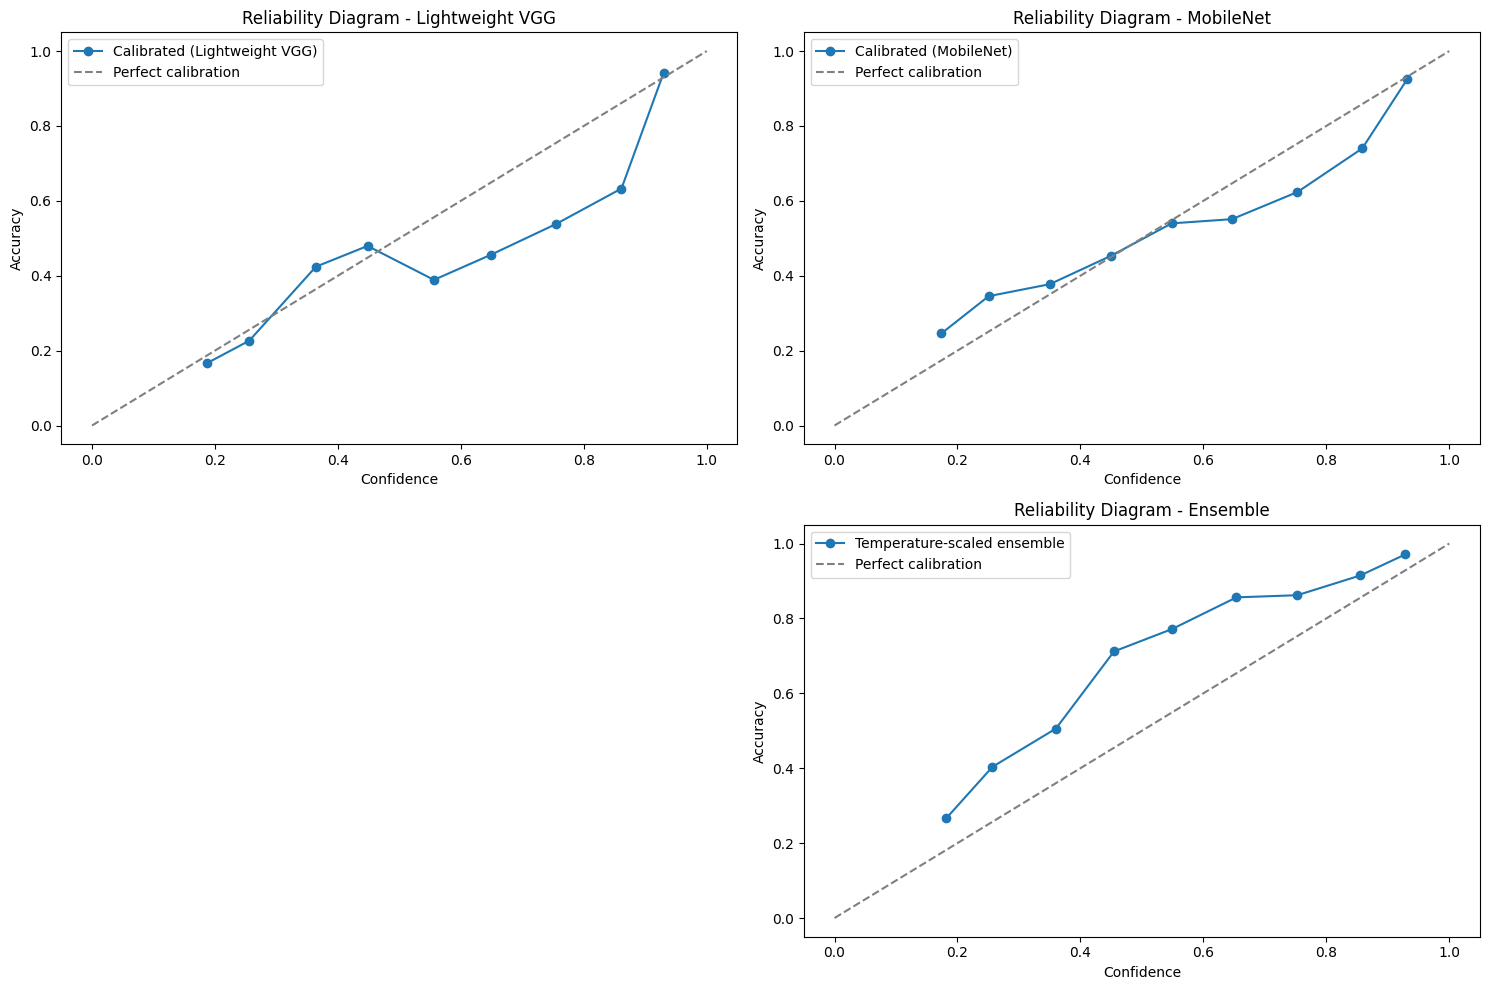


Uncertainty Analysis:
--------------------------------------------------

Lightweight VGG:
Expected Calibration Error: 0.107
Average Confidence: 0.556
Average Accuracy: 0.473

MobileNet:
Expected Calibration Error: 0.062
Average Confidence: 0.551
Average Accuracy: 0.533

Ensemble:
Expected Calibration Error: 0.141
Average Confidence: 0.555
Average Accuracy: 0.696


In [37]:
class CalibrationAnalyzer:
    def __init__(self, models, model_names, class_names):
        self.models = models
        self.model_names = model_names
        self.class_names = class_names
        self.temperatures = [1.0] * len(models)  # Learnable temperature parameters
        
    def optimize_temperature(self, X_val, y_val, max_iter=100):
        """Optimize temperature scaling parameters for each model"""
        print("Optimizing temperature scaling parameters...")
        
        for i, model in enumerate(self.models):
            # Get raw logits
            logits = model.predict(X_val)
            
            # Define temperature optimization function
            def temperature_scale(temp):
                return -np.mean(np.log(softmax(logits/temp, axis=1)[
                    np.arange(len(y_val)), np.argmax(y_val, axis=1)]))
            
            # Binary search for optimal temperature
            left, right = 0.1, 5.0
            best_temp = 1.0
            best_loss = temperature_scale(1.0)
            
            for _ in range(max_iter):
                mid = (left + right) / 2
                mid_loss = temperature_scale(mid)
                
                if mid_loss < best_loss:
                    best_loss = mid_loss
                    best_temp = mid
                    
                # Update search interval
                delta = 0.01
                left_loss = temperature_scale(mid - delta)
                right_loss = temperature_scale(mid + delta)
                
                if left_loss < right_loss:
                    right = mid
                else:
                    left = mid
            
            self.temperatures[i] = best_temp
            print(f"Optimal temperature for {self.model_names[i]}: {best_temp:.3f}")
    
    def analyze_uncertainty(self, X_test, y_test, num_samples=10):
        """Analyze model uncertainty with temperature scaling"""
        plt.figure(figsize=(15, 10))
        
        # Get predictions with temperature scaling
        all_confidences = []
        all_accuracies = []
        
        for model, temp, name in zip(self.models, self.temperatures, self.model_names):
            # Get predictions
            logits = model.predict(X_test)
            calibrated_probs = softmax(logits/temp, axis=1)
            
            # Calculate confidence and accuracy
            confidences = np.max(calibrated_probs, axis=1)
            predictions = np.argmax(calibrated_probs, axis=1)
            true_classes = np.argmax(y_test, axis=1)
            accuracies = (predictions == true_classes)
            
            # Bin predictions by confidence
            bins = np.linspace(0, 1, 11)
            bin_indices = np.digitize(confidences, bins) - 1
            
            bin_confidences = []
            bin_accuracies = []
            
            for bin_idx in range(len(bins)-1):
                mask = bin_indices == bin_idx
                if np.any(mask):
                    bin_confidences.append(np.mean(confidences[mask]))
                    bin_accuracies.append(np.mean(accuracies[mask]))
            
            all_confidences.append(bin_confidences)
            all_accuracies.append(bin_accuracies)
            
            # Plot reliability diagram
            plt.subplot(2, 2, len(all_confidences))
            plt.plot(bin_confidences, bin_accuracies, 'o-', label=f'Calibrated ({name})')
            plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfect calibration')
            plt.xlabel('Confidence')
            plt.ylabel('Accuracy')
            plt.title(f'Reliability Diagram - {name}')
            plt.legend()
            
        # Plot ensemble reliability
        ensemble_logits = np.mean([model.predict(X_test)/temp 
                                 for model, temp in zip(self.models, self.temperatures)], axis=0)
        ensemble_probs = softmax(ensemble_logits, axis=1)
        
        ensemble_confidences = np.max(ensemble_probs, axis=1)
        ensemble_predictions = np.argmax(ensemble_probs, axis=1)
        ensemble_accuracies = (ensemble_predictions == true_classes)
        
        # Bin ensemble predictions
        bin_indices = np.digitize(ensemble_confidences, bins) - 1
        ensemble_bin_confidences = []
        ensemble_bin_accuracies = []
        
        for bin_idx in range(len(bins)-1):
            mask = bin_indices == bin_idx
            if np.any(mask):
                ensemble_bin_confidences.append(np.mean(ensemble_confidences[mask]))
                ensemble_bin_accuracies.append(np.mean(ensemble_accuracies[mask]))
        
        plt.subplot(2, 2, 4)
        plt.plot(ensemble_bin_confidences, ensemble_bin_accuracies, 'o-', 
                label='Temperature-scaled ensemble')
        plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfect calibration')
        plt.xlabel('Confidence')
        plt.ylabel('Accuracy')
        plt.title('Reliability Diagram - Ensemble')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Print analysis
        print("\nUncertainty Analysis:")
        print("-" * 50)
        for name, confidences, accuracies in zip(self.model_names, all_confidences, all_accuracies):
            ece = np.mean(np.abs(np.array(confidences) - np.array(accuracies)))
            print(f"\n{name}:")
            print(f"Expected Calibration Error: {ece:.3f}")
            print(f"Average Confidence: {np.mean(confidences):.3f}")
            print(f"Average Accuracy: {np.mean(accuracies):.3f}")
        
        ensemble_ece = np.mean(np.abs(np.array(ensemble_bin_confidences) - 
                                    np.array(ensemble_bin_accuracies)))
        print(f"\nEnsemble:")
        print(f"Expected Calibration Error: {ensemble_ece:.3f}")
        print(f"Average Confidence: {np.mean(ensemble_bin_confidences):.3f}")
        print(f"Average Accuracy: {np.mean(ensemble_bin_accuracies):.3f}")

# Use the analyzer
calibration_analyzer = CalibrationAnalyzer(
    models=[model, model1],  # model has VGG weights loaded (87.36%), model1 is MobileNet (66.56%)
    model_names=['Lightweight VGG', 'MobileNet'],
    class_names=class_names
)

# First optimize temperature scaling parameters
calibration_analyzer.optimize_temperature(X_valid, y_valid)

# Then analyze uncertainty
calibration_analyzer.analyze_uncertainty(X_test, y_test)